## Assignment 8 B
### Shubham Sharma , NU ID: 001258382

**NOTE: This notebook file was written with Python 3 set as enviorment, Please use Python 3 running this notebook.**

In [132]:
%pylab inline
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc, classification_report, confusion_matrix, precision_recall_curve

Populating the interactive namespace from numpy and matplotlib


In [133]:
fileURL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
census = pd.read_csv(fileURL,names= ['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num','Marital-status','Occupation',
                                  'Relationship','Race','Sex','Capital-gain','Capital-loss','hours-per-week','Native-country',
                                  'Income'], header=None)

In [134]:
census['Income'] = census['Income'].map({' <=50K': 0, ' >50K': 1}).astype(int)
census['Occupation'] = census['Occupation'].map({' Transport-moving': 1, ' Machine-op-inspct': 2, ' Sales': 3,
                                                 ' Exec-managerial': 4, ' Tech-support': 5, ' Prof-specialty': 6,
                                                 ' Craft-repair': 7, ' Adm-clerical': 8, ' Farming-fishing': 9, ' ?': 0,
                                                 ' Armed-Forces': 10, ' Other-service': 11, ' Handlers-cleaners': 12,
                                                 ' Priv-house-serv': 13, ' Protective-serv': 14}).astype(int)
census['Sex'] = census['Sex'].map({' Male': 0, ' Female': 1}).astype(int)
census['Race'] = census['Race'].map({' Asian-Pac-Islander': 1, ' Other': 0, ' Black': 2,
                                     ' Amer-Indian-Eskimo': 3, ' White': 4}).astype(int)

In [135]:
X = census[['Age','Education-num','Capital-gain','Capital-loss','hours-per-week']].values
Y = census[['Income']].values

In [136]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.3, random_state=0)

In [137]:
Y.shape

(32561, 1)

## Decision tree model

In [138]:
model = tree.DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=10, min_samples_leaf=5)
model.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=100,
            splitter='best')

In [139]:
predictions = model.predict(X_test)

### Accuracy of model on test data

In [140]:
print('The accuracy of the model is',metrics.accuracy_score(predictions,Y_test))

The accuracy of the model is 0.834271675709


For computing accuracy of the model we used accuracy_score function from sklearn. In comparison to other models which we tested in previous assignments with different options for criterion and maximum depth, this model has highest accuracy.
Accuracy of the model is computing by comparing how many instances of test data have been correctly classified. A given model should have high accuracy on unseen data(test dataset). Higher accuracy on training dataset can lead to overfitting. For given model, accuracy on training dataset is following.

In [141]:
print('The accuracy of the model on training dataset is',metrics.accuracy_score(model.predict(X_train),Y_train))

The accuracy of the model on training dataset is 0.843146718147


As observed our model hasn't gone for 100% accuracy on training dataset, which is good. An ideal model has high accuracy on both training and test dataset.

### Precision, Recall and Classification report

In [142]:
print(classification_report(Y_test, predictions))

             precision    recall  f1-score   support

          0       0.85      0.95      0.90      7407
          1       0.76      0.46      0.57      2362

avg / total       0.83      0.83      0.82      9769



Using classification_report function, we can generate Precision and Recall values for each class. For given model we can observe that Precision and Recall values are higher for Class 0(Low Income) and low for Class 1(High Income). By definition of Precision and Recall, we can say that our model misclassifies Class 1 instances more in comparison (due to Low recall value). However precision and recall values are higher for Class 0, which implies that classification of Class 0 instances is highly accurate. Now this could be useful if we are trying to find a model where we want to pay more focus of Class 0 instances but if opposite we need to find another model. One more reason for this anamoly could be less number of instances for Class 1.

### Confusion Matrix

In [143]:
print(confusion_matrix(Y_train, model.predict(X_train)))

[[16699   614]
 [ 2961  2518]]


In [144]:
print(confusion_matrix(Y_test, model.predict(X_test)))

[[7067  340]
 [1279 1083]]


We have generated confusion matrix for both training data and test dataset. By looking at above metrix we can say that our model has higher correct classification rate for Class 0 instances than Class 1 instances. So depending on the requirement this model may be good or bad choice.

### ROC curve and AUROC

In [145]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(Y_test, predictions)
roc_auc = auc(false_positive_rate, true_positive_rate)

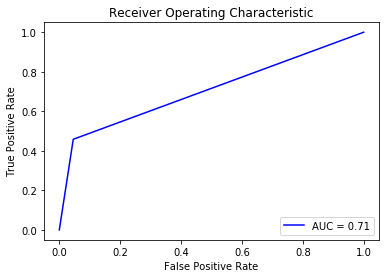

In [146]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate, 'b',
label='AUC = %0.2f'% roc_auc)
plt.legend(loc='lower right')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

As seen above Area under ROC curve is .71, which is not very good and reason for this is not good classification rate for Class 1. Interesting observation here ROC curve or AUROC has been able to capture this shortcoming of our model in most visiually understandble in comparison to other metrics such as Accuracy score which were biased because of high number of Class 0 instancs.

### Precision Recall curve

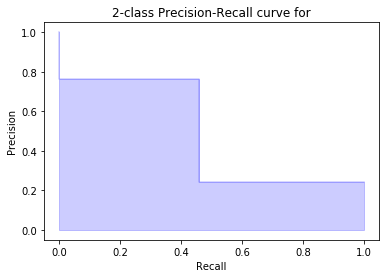

In [152]:
precision, recall, _ = precision_recall_curve(Y_test, predictions)

plt.step(recall, precision, color='b', alpha=0.2,
         where='post')
plt.fill_between(recall, precision, step='post', alpha=0.2,
                 color='b')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('2-class Precision-Recall curve for')

Above we have plotted Precision-recall curve. It shows that data is balanced but our model is not perfect, for high precision it's low recall, but low precision has high recall.